In [1]:
%matplotlib inline
import pandas as pd
import matplotlib 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,ranksums,mannwhitneyu

## Figure 3F

In [2]:
dat=pd.read_table("data/Figure3F.txt",sep="    ")
dat=dat.groupby("group")
High=dat.get_group("High")
Low=dat.get_group("Low")
High=High.sort_values(by="IC50")
Low=Low.sort_values(by="IC50")

mannwhitneyu(np.log2(High.IC50),np.log2(Low.IC50))

<ipython-input-2-54d133469c02>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dat=pd.read_table("data/Figure3F.txt",sep="    ")


MannwhitneyuResult(statistic=0.0, pvalue=0.007107019434541023)

<ipython-input-3-adb3594e1d5c>:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


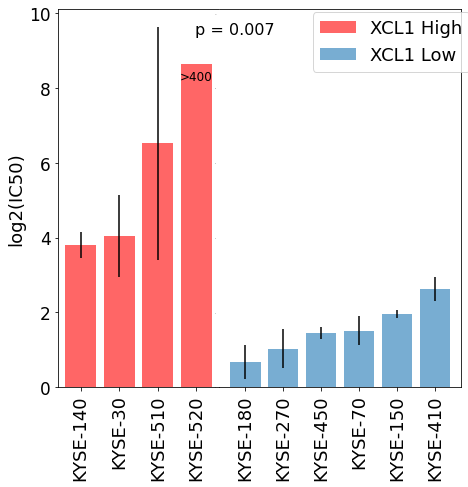

In [3]:
width1=High.shape[0]/10
width2=Low.shape[0]/10
fig=plt.figure(figsize=(7,7))
ax1=fig.add_axes([0.15,0.2,0.8*width1,0.75])
ax1.bar(x=High.cell,height=np.log2(High.IC50),yerr=np.log2(High.sd+1),color="red",alpha=0.6,label="XCL1 High")
ax2=fig.add_axes([0.8*width1+0.15,0.2,0.80*width2,0.75])
ax2.bar(x=Low.cell,height=np.log2(Low.IC50),yerr=np.log2(Low.sd+1),alpha=0.6,label="XCL1 Low")
ax2.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.set_ylim(ax1.get_ylim())
ax2.tick_params(axis='y', which='both',labelsize=0, length=0)
ax1.set_xticklabels(High.cell,rotation=90,fontsize=18)
ax2.set_xticklabels(Low.cell,rotation=90,fontsize=18)
for lab in ax1.get_yticklabels():
    lab.set_fontsize(17)
ax1.text(3,8.2,">400",ha='center',fontsize=12)
ax1.set_ylabel("log2(IC50)",fontsize=18)
fig.text(0.5,0.9,"p = 0.007",ha='center',fontsize=16)
fig.legend(loc="upper right",bbox_to_anchor=(0.1,0.1,0.85,0.86),fontsize=18)
plt.tight_layout()

## Figure 3G

In [4]:
ttest_ind([0.9589,0.8265,0.9095],[2.321,2.169,2.337])

Ttest_indResult(statistic=-20.86451969252826, pvalue=3.118142474826931e-05)

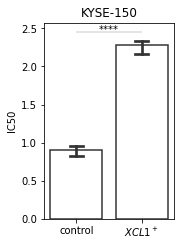

In [5]:
kyse=pd.DataFrame({"cell":["flag"]*3+["XCL1"]*3,
            "IC50":[0.9589,0.8265,0.9095,2.321,2.169,2.337]})

f,ax=plt.subplots(figsize=(3,4))
ax=sns.barplot("cell","IC50",data=kyse,linewidth=1.5, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2",capsize=0.2)
ax.set_title("KYSE-150")
ax.hlines(xmin=0,xmax=1,y=2.45,linewidth=0.2)
ax.text(0.5,2.55,"****",ha='center',va="top")
ax.set_xticklabels(["control","$XCL1^+$"])
ax.set_xlabel("")
plt.subplots_adjust(left=0.3,bottom=0.2)